# Data Analysis on a Nestle Dataset
1. Data Exploratory and Cleaning

In [1]:
import pandas as pd

# Load the dataset
nestle = pd.read_excel('Nestle_Dataset.xlsx')

nestle.head()

,Unnamed: 0,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6
0,NaN,Sales ID,Date,Product Name,Total Revenue,Sales Location,Sales Medium
1,NaN,AT-18056,2020-06-07 00:00:00,Nescafe,279.3,Australian Capital Territory,Online
2,NaN,AT-9867,2019-05-14 00:00:00,Nescafe,263.46075,Australian Capital Territory,Direct
3,NaN,AT-11225,2019-07-07 00:00:00,Nescafe,258.72,Australian Capital Territory,Online
4,NaN,AT-3208,2018-06-25 00:00:00,Nescafe,236.884375,Australian Capital Territory,Online


In [2]:
# Read the data from the Excel file, specifying header row and starting column
df = pd.read_excel("Nestle_Dataset.xlsx", header=None, skiprows=1, usecols=range(1, 7))  # Assuming data starts from B2

# Set the first row as the header
df.columns = df.iloc[0]
df = df.iloc[1:, :]
df = df.reset_index(drop=True)

df.head()

,Sales ID,Date,Product Name,Total Revenue,Sales Location,Sales Medium
0,AT-18056,2020-06-07 00:00:00,Nescafe,279.3,Australian Capital Territory,Online
1,AT-9867,2019-05-14 00:00:00,Nescafe,263.46075,Australian Capital Territory,Direct
2,AT-11225,2019-07-07 00:00:00,Nescafe,258.72,Australian Capital Territory,Online
3,AT-3208,2018-06-25 00:00:00,Nescafe,236.884375,Australian Capital Territory,Online
4,AT-18812,2020-07-04 00:00:00,Nescafe,235.2,Australian Capital Territory,Online


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18115 entries, 0 to 18114
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Sales ID        18115 non-null  object
 1   Date            18115 non-null  object
 2   Product Name    18115 non-null  object
 3   Total Revenue   18115 non-null  object
 4   Sales Location  18115 non-null  object
 5   Sales Medium    18115 non-null  object
dtypes: object(6)
memory usage: 849.3+ KB


In [4]:
# Format data types
df['Sales ID'] = df['Sales ID'].astype(str)  # String
df['Date'] = pd.to_datetime(df['Date'], dayfirst=True)  # Date
df['Product Name'] = df['Product Name'].astype('category')  # Category
df['Total Revenue'] = df['Total Revenue'].replace('[\$,]', '', regex=True).astype(float)
df['Sales Location'] = df['Sales Location'].astype('category')  # Category
df['Sales Medium'] = df['Sales Medium'].astype('category')  # Category

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18115 entries, 0 to 18114
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Sales ID        18115 non-null  object        
 1   Date            18115 non-null  datetime64[ns]
 2   Product Name    18115 non-null  category      
 3   Total Revenue   18115 non-null  float64       
 4   Sales Location  18115 non-null  category      
 5   Sales Medium    18115 non-null  category      
dtypes: category(3), datetime64[ns](1), float64(1), object(1)
memory usage: 478.6+ KB


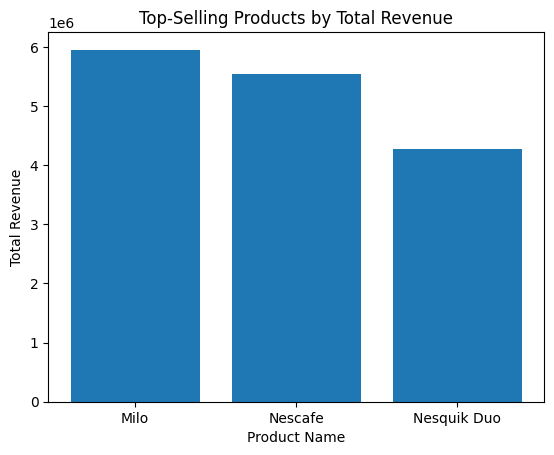

In [5]:
import matplotlib.pyplot as plt

# Group the data by Product Name and calculate the total revenue
product_revenue = df.groupby('Product Name')['Total Revenue'].sum().reset_index()

# Sort the data by total revenue in descending order
product_revenue = product_revenue.sort_values('Total Revenue', ascending=False)

# Select the top-selling products (e.g., top 3)
top_products = product_revenue.head(3)

# Create a bar chart
plt.bar(top_products['Product Name'], top_products['Total Revenue'])
plt.xlabel('Product Name')
plt.ylabel('Total Revenue')
plt.title('Top-Selling Products by Total Revenue')
plt.show()

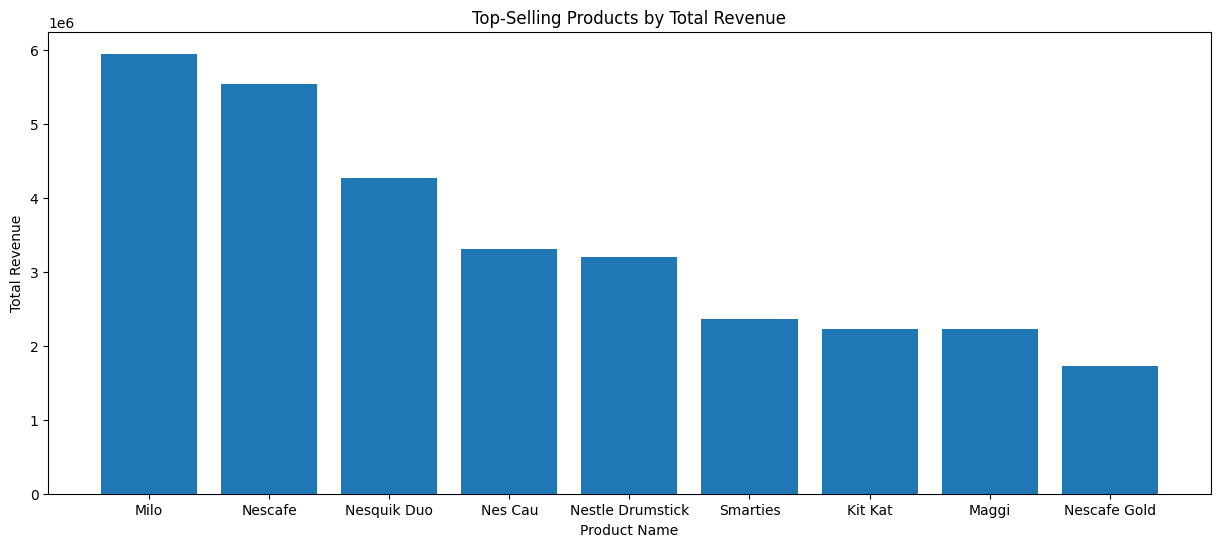

In [6]:
import matplotlib.pyplot as plt

# Group the data by Product Name and calculate the total revenue
product_revenue = df.groupby('Product Name')['Total Revenue'].sum().reset_index()

# Sort the data by total revenue in descending order
product_revenue = product_revenue.sort_values('Total Revenue', ascending=False)

# # Select the top-selling products (e.g., top 3)
# top_products = product_revenue.head(3)

# Create a bar chart
plt.figure(figsize=(15, 6))
plt.bar(product_revenue['Product Name'], product_revenue['Total Revenue'])
plt.xlabel('Product Name')
plt.ylabel('Total Revenue')
plt.title('Top-Selling Products by Total Revenue')
plt.show()

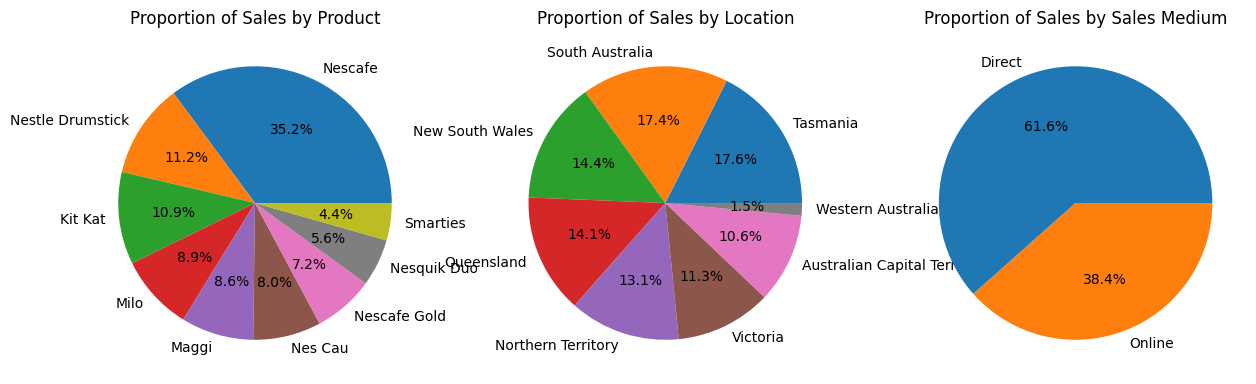

In [7]:
# Create a figure and a set of subplots
fig, axs = plt.subplots(1, 3, figsize=(15, 5))

# Pie chart 1: Product
product_counts = df['Product Name'].value_counts()
axs[0].pie(product_counts, labels=product_counts.index, autopct='%1.1f%%')
axs[0].set_title('Proportion of Sales by Product')

# Pie chart 2: Location
location_counts = df['Sales Location'].value_counts()
axs[1].pie(location_counts, labels=location_counts.index, autopct='%1.1f%%')
axs[1].set_title('Proportion of Sales by Location')

# Pie chart 3: Sales Medium
medium_counts = df['Sales Medium'].value_counts()
axs[2].pie(medium_counts, labels=medium_counts.index, autopct='%1.1f%%')
axs[2].set_title('Proportion of Sales by Sales Medium')

# Show the plot
plt.show()

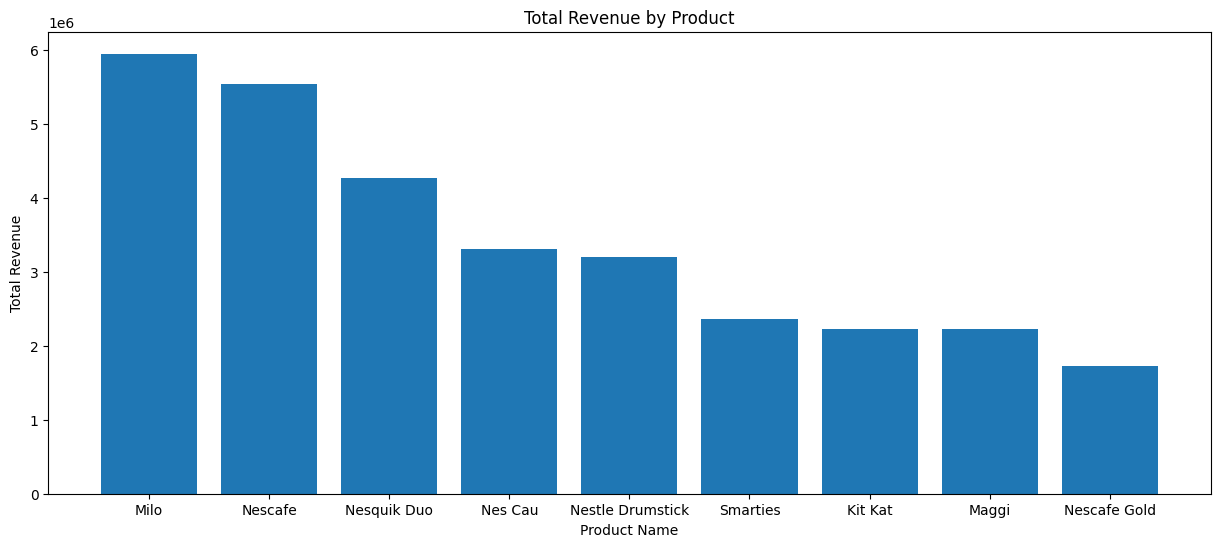

In [8]:
# Group the data by Product Name and calculate the total revenue
product_revenue = df.groupby('Product Name')['Total Revenue'].sum().reset_index()

# Sort the data by total revenue in descending order
product_revenue = product_revenue.sort_values('Total Revenue', ascending=False)

# Create a bar chart
plt.figure(figsize=(15, 6))
plt.bar(product_revenue['Product Name'], product_revenue['Total Revenue'])
plt.xlabel('Product Name')
plt.ylabel('Total Revenue')
plt.title('Total Revenue by Product')
plt.show()

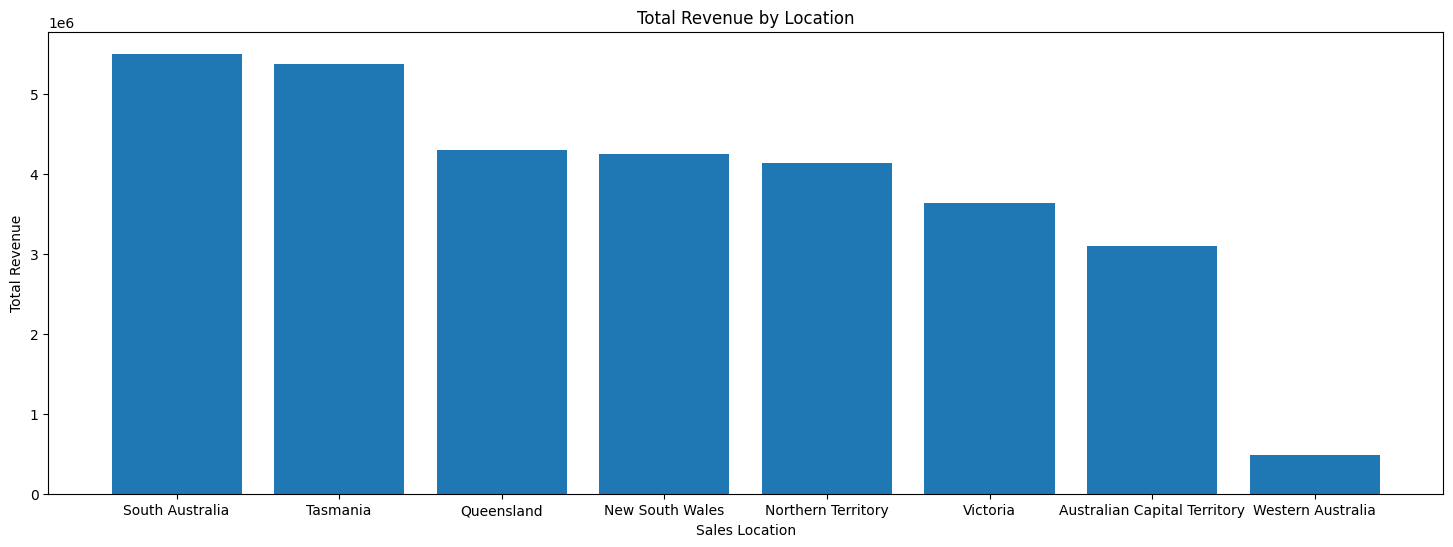

In [17]:
# Group the data by Sales Location and calculate the total revenue
location_revenue = df.groupby('Sales Location')['Total Revenue'].sum().reset_index()

# Sort the data by total revenue in descending order
location_revenue = location_revenue.sort_values('Total Revenue', ascending=False)

# Create a bar chart
plt.figure(figsize=(18, 6))
plt.bar(location_revenue['Sales Location'], location_revenue['Total Revenue'])
plt.xlabel('Sales Location')
plt.ylabel('Total Revenue')
plt.title('Total Revenue by Location')
plt.show()

# other Ideas -> Plot this same graph but per Sales Medium

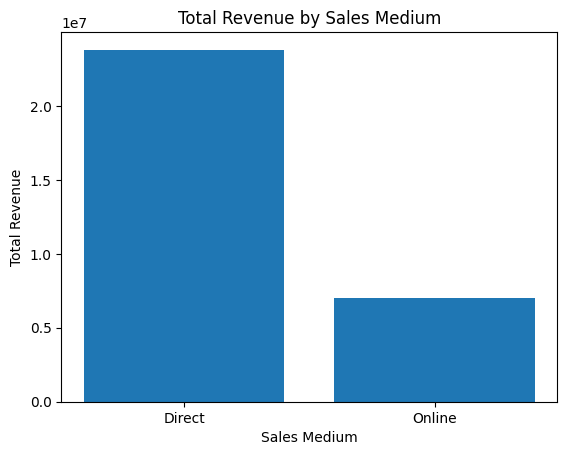

In [10]:
# Group the data by Sales Medium and calculate the total revenue
medium_revenue = df.groupby('Sales Medium')['Total Revenue'].sum().reset_index()

# Sort the data by total revenue in descending order
medium_revenue = medium_revenue.sort_values('Total Revenue', ascending=False)

# Create a bar chart
plt.bar(medium_revenue['Sales Medium'], medium_revenue['Total Revenue'])
plt.xlabel('Sales Medium')
plt.ylabel('Total Revenue')
plt.title('Total Revenue by Sales Medium')
plt.show()

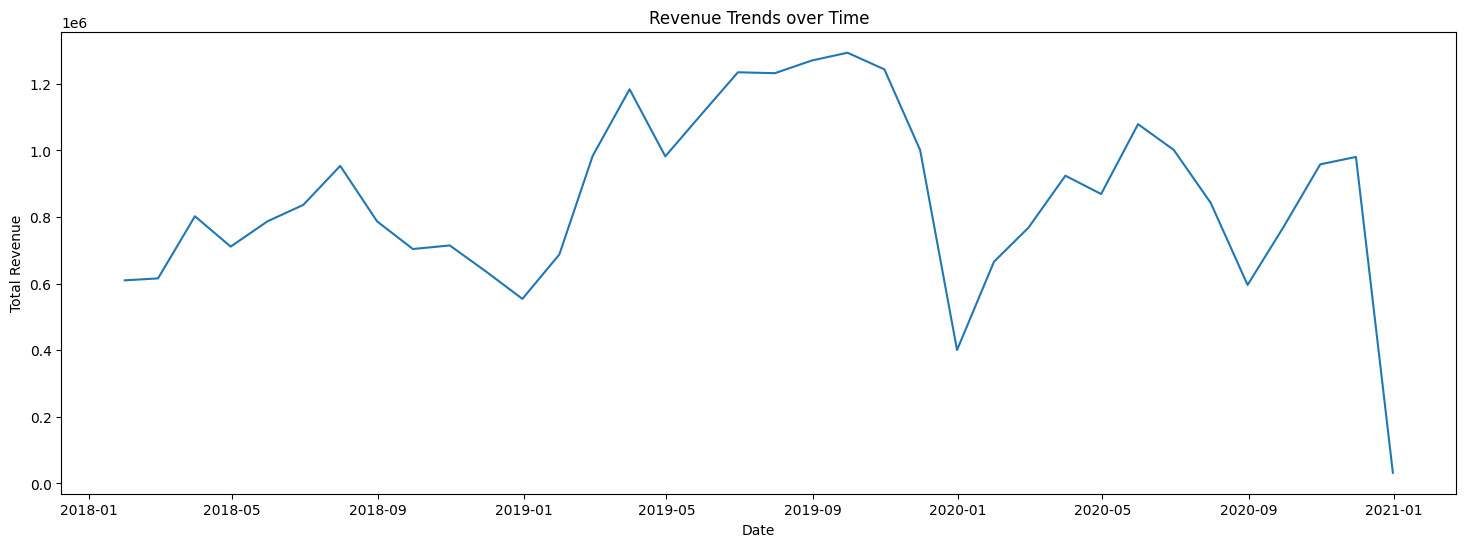

In [11]:
import pandas as pd
import matplotlib.pyplot as plt

# Read the data from the Excel file, specifying header row and starting column
ns = pd.read_excel("Nestle_Dataset.xlsx", header=None, skiprows=1, usecols=range(1, 7))

# Set the first row as the header
ns.columns = ns.iloc[0]
ns = ns.iloc[1:, :]
ns = ns.reset_index(drop=True)

# Convert the Date column to datetime
ns['Date'] = pd.to_datetime(ns['Date'])

# Set the Date column as the index
ns.set_index('Date', inplace=True)

# Resample the data by month and calculate the total revenue
monthly_revenue = ns.resample('M')['Total Revenue'].sum()

# Create a line chart
plt.figure(figsize=(18, 6))
plt.plot(monthly_revenue.index, monthly_revenue.values)

plt.xlabel('Date')
plt.ylabel('Total Revenue')
plt.title('Revenue Trends over Time')
plt.show()

# Other Ideas -> do revenue trend over time, per product

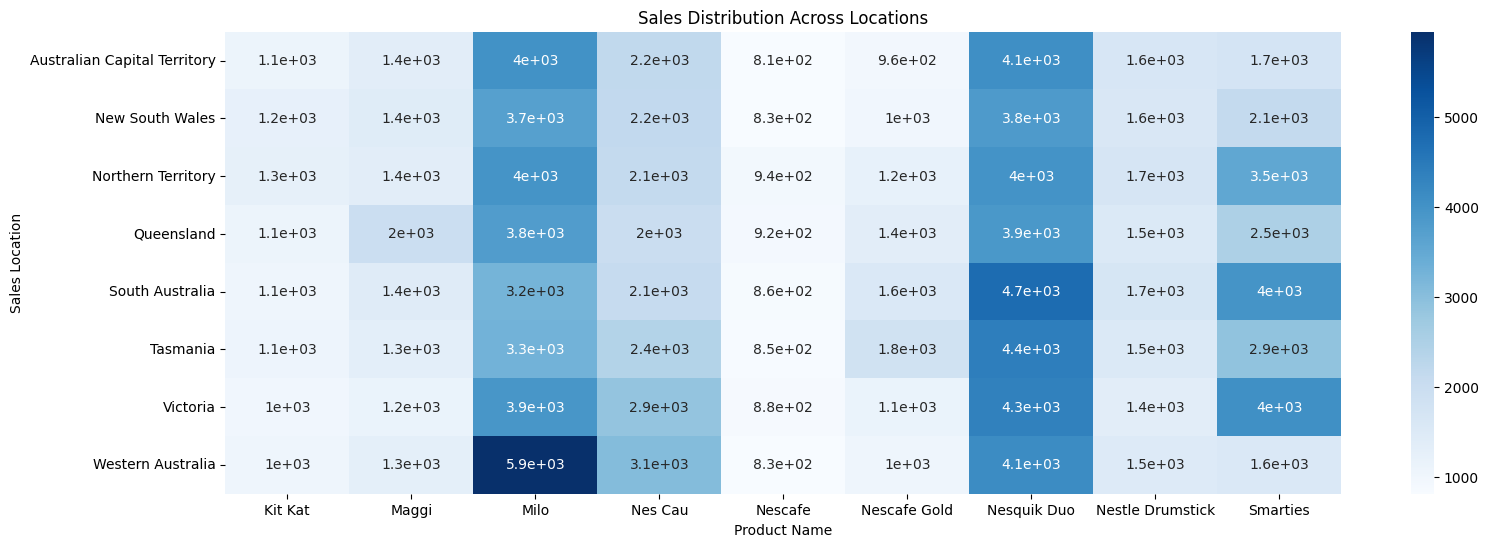

In [12]:
import seaborn as sns

# Pivot the data to create a matrix of sales by location
sales_by_location = df.pivot_table(index='Sales Location', columns='Product Name', values='Total Revenue')

# Create a heatmap
plt.figure(figsize=(18, 6))
sns.heatmap(sales_by_location, annot=True, cmap='Blues')

# Add labels and title
plt.xlabel('Product Name')
plt.ylabel('Sales Location')
plt.title('Sales Distribution Across Locations')

# Show the plot
plt.show()

In [14]:
mean_revenue = df['Total Revenue'].mean()
median_revenue = df['Total Revenue'].median()
mode_revenue = df['Total Revenue'].mode()[0]  # Get the first mode value
std_dev_revenue = df['Total Revenue'].std()

# Print the statistics
print("Mean Revenue:", mean_revenue)
print("Median Revenue:", median_revenue)
print("Mode Revenue:", mode_revenue)
print("Standard Deviation of Revenue:", std_dev_revenue)

# Other Ideas -> make the statistics per product. it makes more sense that way

Mean Revenue: 1701.3383808333904
Median Revenue: 992.4687500000001
Mode Revenue: 498.26874999999995
Standard Deviation of Revenue: 2893.481048804228


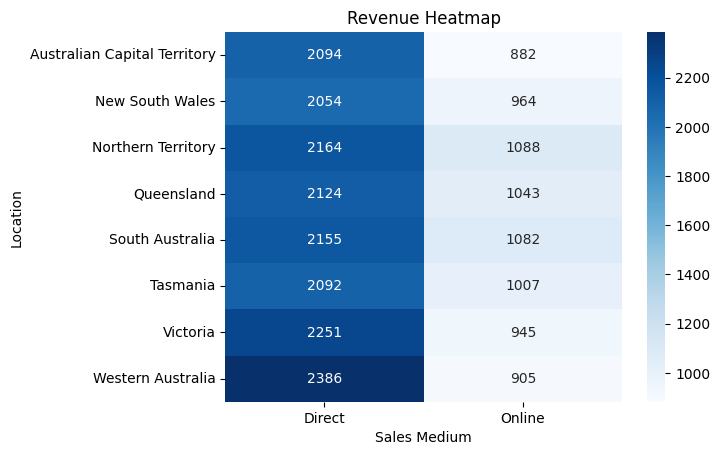

In [16]:
# Pivot the data to create a matrix of revenue by location and sales medium
revenue_matrix = df.pivot_table(index='Sales Location', columns='Sales Medium', values='Total Revenue')

# Create a heatmap
sns.heatmap(revenue_matrix, annot=True, cmap='Blues', fmt='.0f')

# Add labels and title
plt.xlabel('Sales Medium')
plt.ylabel('Location')
plt.title('Revenue Heatmap')

# Show the plot
plt.show()

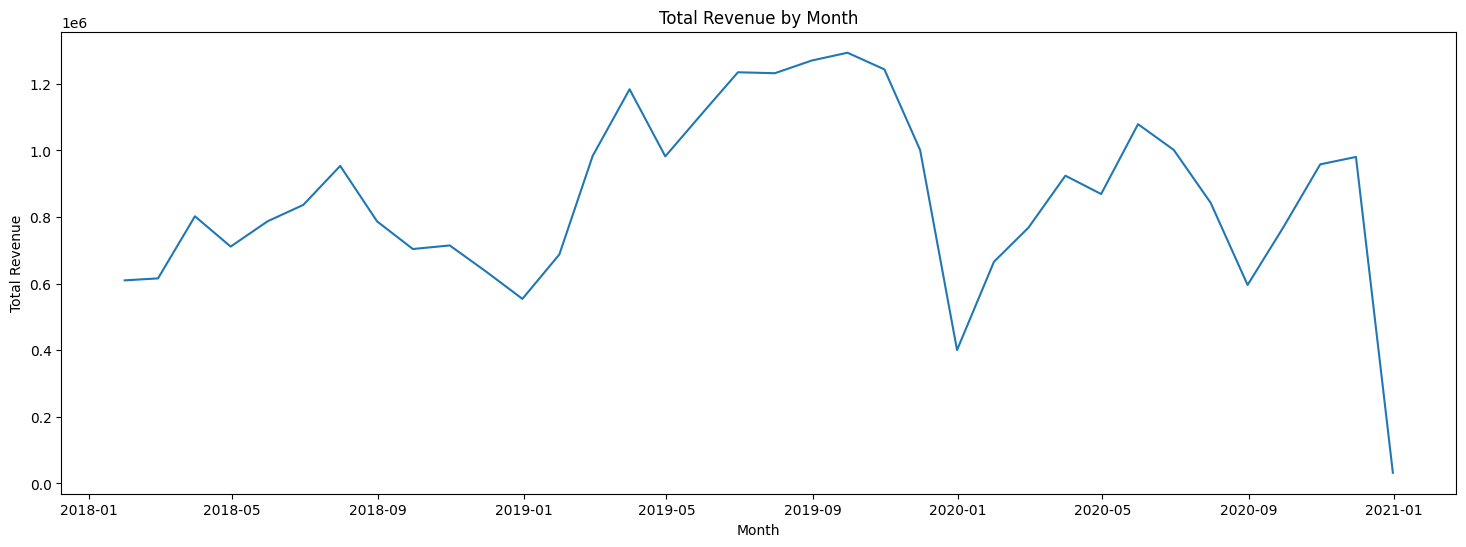

In [ ]:
st= df

# Convert the Date column to datetime
st['Date'] = pd.to_datetime(st['Date'])

# Set the Date column as the index
st.set_index('Date', inplace=True)

# Resample the data by month and calculate the total revenue
monthly_revenue = st.resample('M')['Total Revenue'].sum()

# Plot the monthly revenue
plt.figure(figsize=(18, 6))
plt.plot(monthly_revenue.index, monthly_revenue.values)
plt.xlabel('Month')
plt.ylabel('Total Revenue')
plt.title('Total Revenue by Month')
plt.show()

Month
Apr    2.562238e+06
Aug    2.652577e+06
Dec    9.869855e+05
Feb    2.367130e+06
Jan    1.962748e+06
Jul    3.027860e+06
Jun    3.072412e+06
Mar    2.909841e+06
May    2.977024e+06
Nov    2.618799e+06
Oct    2.915970e+06
Sep    2.766160e+06
Name: Total Revenue, dtype: float64


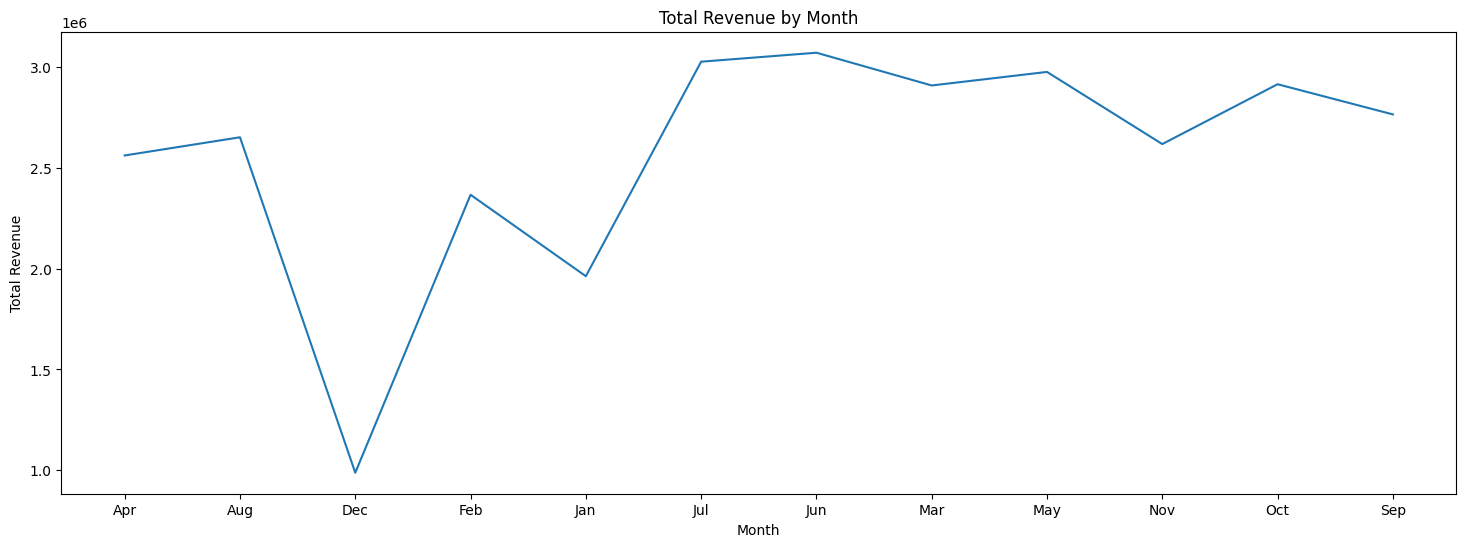

In [18]:
# Extract the month from the Date column and create a new column
df['Month'] = pd.to_datetime(df['Date']).dt.strftime('%b')

# Aggregate total revenue by month
monthly_revenue = df.groupby('Month')['Total Revenue'].sum()

# Print the monthly revenue
print(monthly_revenue)

# Plot the monthly revenue
plt.figure(figsize=(18, 6))
plt.plot(monthly_revenue.index, monthly_revenue.values)
plt.xlabel('Month')
plt.ylabel('Total Revenue')
plt.title('Total Revenue by Month')
plt.show()

# Order the months